In [1]:
install.packages("/work/pi_sarah_gignouxwolfsohn_uml_edu/caroline/BEL_16S_outputs/ggupset-0.4.1.tar.gz", repos = NULL, type = "source")

In [29]:
require(data.table)
require(tidyverse)
require(phyloseq)
require(genefilter)
require(UpSetR)
require(ggplot2)
require(vegan)
require(RColorBrewer)
library("ggupset")

In [30]:
ps<-readRDS(file = "/work/pi_sarah_gignouxwolfsohn_uml_edu/caroline/RDS/ps_discard_untrim.rds")

In [31]:
ps <- prune_taxa(taxa_sums(ps) > 0, ps)

In [32]:
#isolate just bacteria
ps_norm_bac=subset_taxa(ps, Kingdom=="Bacteria")
ps_norm_bac
#remove chloroplast order and mitchondria family
ps_norm_nochlo=subset_taxa(ps_norm_bac, Order!="Chloroplast")
ps_clean=subset_taxa(ps_norm_nochlo, Family!="Mitochondria")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 71362 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 75125 sample variables ]
tax_table()   Taxonomy Table:    [ 71362 taxa by 6 taxonomic ranks ]

## new df for all sampled in each species based on ps_clean

In [33]:
#new dataframes for each species 
ps_mcav <- subset_samples(ps_clean, species == "MCAV")
ps_pstr <- subset_samples(ps_clean, species == "PSTR")
ps_ofav <- subset_samples(ps_clean, species == "OFAV")
ps_ssid <- subset_samples(ps_clean, species == "SSID")
ps_oann <- subset_samples(ps_clean, species == "OANN")
ps_past <- subset_samples(ps_clean, species == "PAST") 

In [7]:
#should add up to 57 samples bc not isolating samples with repeated colonies
nrow(sample_data(ps_mcav))
nrow(sample_data(ps_pstr))
nrow(sample_data(ps_ofav))
nrow(sample_data(ps_oann))
nrow(sample_data(ps_ssid))
nrow(sample_data(ps_past))

[1] 16

[1] 12

[1] 9

[1] 3

[1] 8

[1] 9

# Gene filter

## core microbiome in coral samples

In [78]:
#kOverA assumes taxa are rows, so need to transpose
ps_clean_t <- ps_clean
otu_table(ps_clean_t) <- t(otu_table(ps_clean))
taxa_are_rows(ps_clean_t)

[1] TRUE


### there are NO otu's shared among every sample

In [79]:
#how many samples each otu is present in
otu <- as(otu_table(ps_clean_t), "matrix")
prev <- rowSums(otu > 0)

summary(prev)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.265   2.000  53.000 

In [81]:
sum(otu == 0)

[1] 1990891

### how many taxa shared across 53 samples?
### and what are the 4 odd samples out??

In [85]:
flist <- filterfun(kOverA(53, 0))
all <- filter_taxa(ps_clean_t, flist, prune = TRUE)
tax_table(all)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGCGGCTTGTTAAGCCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGGAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Photobacterium
TACGGAGGGGGTTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGATCGGAAAGTTGGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTCCAAAACTATCGGTCTAGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGTGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodobacterales,Paracoccaceae,Ruegeria
TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTTAGAGGTGAAAGCCTGGAGCTTAACTCCAGAATTGCCTTTAAGACTGCATCGCTTGAATCCGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGACCGGTATTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Hephaestia


## what are the most abundant otus across corals?

they are Vibrio, Paracoccaceae, and Sphingomonadaceae

## reduce the size of the pool based on meta data:
## species

In [6]:
#otu is already a matrix based on ps_t
meta <- sample_data(ps_clean_t)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'sample_data': object 'ps_clean_t' not found


In [ ]:
#what otus present in every MCAV?
flist= filterfun(kOverA(16, 0))
mcav=phyloseq::filter_taxa(ps_mcav, flist, TRUE )
tax_table(mcav)

In [ ]:
#what otus present in every PAST?
flist= filterfun(kOverA(9, 0))
past=phyloseq::filter_taxa(ps_past, flist, TRUE )
tax_table(past)

In [98]:
#what otus present in every OFAV?
flist= filterfun(kOverA(9, 0))
ofav=phyloseq::filter_taxa(ps_ofav, flist, TRUE )
tax_table(ofav)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTTCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGTTTGCTAAGTCAGATGTGAAATCCCTGGGCTTAACCTAGGAACTGCATTTGAAACTAGCAAGCTAGAGTATGGTAGAGGTGGGTGGAATTTCAGGTGTAGCGGTGGAATGCGTAGAGATCTGAAGGAACATCAGTGGCGAAGGCGGCTCACTGGGCCATCACTGACGCTGAGGTGCGAAAGCGTGGGTAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Nitrosococcales,Methylophagaceae,Marine Methylotrophic Group 3
TACGAAGGGAGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGTGTAGGCGGATTATCAAGTTAGGGGTGAAATCCCGGGGCTCAACCTCGGCACTGCCTTTAAGACTGATAATCTAGAGTATGTGAGGGGATAATGGAATACCTAGTGTAGAGGTGAAATTCGTAGATATTAGGTGGAACACCAGTGGCGAAGGCGATTATCTGGCACATTACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACGGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodospirillales,Terasakiellaceae,Marivibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATTGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGCGGCTTGTTAAGCCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGGAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Photobacterium
TACGGAGGGTGCAAGCGTTATCCGGATTTACTGGGTTTAAAGAGTGCGTAGGCGGCTTCTTAAGTCAGTGGTGAAAGCTTAGCGCTTAACGCTAGAAGTGCCACTGATACTGGGAAGCTTGAGTCAAGAAGAGGTAAGCAGAATTCATAGTGTAGCAGTGAAATGCTTAGATACTATGAGGAATACCAACAGCGAAGGCAGCTTACTGGTCTTGTACTGACGTTGAGGCACGAAAGCGTGGGTAGCGAACAGG,Bacteria,Bacteroidota,Bacteroidia,Cytophagales,Amoebophilaceae,Candidatus Amoebophilus
TACGGAGGGGGTTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGATCGGAAAGTTGGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTCCAAAACTATCGGTCTAGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGTGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodobacterales,Paracoccaceae,Ruegeria
TACGGAGGGTGCAAGCGTTATTCGGAATCATTGGGTTTAAAGGGTTCGTAGGCGGATTGGTAAGTCAGGGGTGAAAAGCTGCAGCTTAACTGTAGTCGTGCCTTTGATACTGTCAGTCTTGAGTTATATTGAAGTAAGTAGAATATGTAGTGTAGCGGTGAAATGCTTAGATATTACATAGAATACCGATTGCGAAGGCAGCTTACTAAGTATATACTGACGCTGATGAACGAAAGCGTGGGGAGCGAAGGGG,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Maritimimonas
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGATTGTTAAGCTAGAGGTGAAAGCCCCGCGCTCAACGTGGGAATTGCCTTTAGAACTGGCAGTCTAGAGTCTTGGAGAGGGGAGTGGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAACATCAGTGGCGAAGGCGACTCCCTGGCCAAAGACTGACGCTCATGTGCGAAAGTGTGGGTAGCGAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Alteromonadaceae,Planctobacterium
CACGTATGGGGCGAGCGTTGTTCGGATTTATTGGGCGTAAAGGGCGCGTAGGCGGACGTGCAAGTCTGGTGTGAAAGACCGCAGCTCAACTGCGGGCACGCACTGGAAACTGCATATCTTGAATCCTTGAGGGGGAACTGGAATTCCTGGTGTAGGGGTGAAATCTGTAGATATCAGGAAGAACACCGGTGGCGAAGGCGAGTTCCTGGCAAGTGATTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Alkalispirochaeta


### OANNs it actually makes sense that they have a lot in common because there were only three samples, and at least two are from the same colony

In [97]:
#what otus present in every OANN?
flist= filterfun(kOverA(3, 0))
oann=phyloseq::filter_taxa(ps_oann, flist, TRUE )
tax_table(oann)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGGCGGCCTTTTAAGTTGGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATCCAAAACTGAGAGGCTCGAGTGCGGAAGAGGAGTGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAAGAACACCAGTGGCGAAGGCGACACTCTGGTCTGACACTGACGCTGAGGTACGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Endozoicomonadaceae,Parendozoicomonas
TACGGAGGGTTCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGTTTGCTAAGTCAGATGTGAAATCCCTGGGCTTAACCTAGGAACTGCATTTGAAACTAGCAAGCTAGAGTATGGTAGAGGTGGGTGGAATTTCAGGTGTAGCGGTGGAATGCGTAGAGATCTGAAGGAACATCAGTGGCGAAGGCGGCTCACTGGGCCATCACTGACGCTGAGGTGCGAAAGCGTGGGTAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Nitrosococcales,Methylophagaceae,Marine Methylotrophic Group 3
TACGAAGGGAGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGTGTAGGCGGATTATCAAGTTAGGGGTGAAATCCCGGGGCTCAACCTCGGCACTGCCTTTAAGACTGATAATCTAGAGTATGTGAGGGGATAATGGAATACCTAGTGTAGAGGTGAAATTCGTAGATATTAGGTGGAACACCAGTGGCGAAGGCGATTATCTGGCACATTACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAACGGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodospirillales,Terasakiellaceae,Marivibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATTGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTACGTAGGCGGTGTGTTAAGCTAGATGTGAAAGCCCCGGGCTCAACCTGGGAATAGCATTTAGAACTGGCACGCTAGAGTCCTGAAGAGGGTGGTAGAATTTCCAGTGTAGCGGTGAAATGCGTAGATATTGGAAGGAATACCGGTGGCGAAGGCGGCCACCTGGTCAGAGACTGACGCTGAGGTACGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Idiomarinaceae,Idiomarina
TACGAAGGGGGCGAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCGCGCAGGCGGCTAATCCAGTCAGGTGTGAAAGCCCTGGGCTTAACCTAGGAACTGCACTTGATACTGATTAGCTAGAAAACGGAAGAGGGCAGTGGAATTCCCAGTGTAGAGGTGAAATTCGTAGATATTGGGAAGAACACCAGTGGCGAAAGCGGCTGCCTGGTCCGATTTTGACGCTGAGGTGCGAAAGCGTGGGTAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Puniceispirillales,SAR116 clade,NA
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAACTGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGCTAGATGTGAAAGCCCCGGGCTCAACCTGGGATGGTCATTTAGAACTGGCAGACTAGAGTCTTGGAGAGGGGAGTGGAATTCCAGGTGTAGCGGTGAAATGCGTAGATATCTGGAGGAACATCAGTGGCGAAGGCGACTCCCTGGCCAAAGACTGACGCTCATGTGCGAAAGTGTGGGTAGCGAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Alteromonadaceae,Alteromonas
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAACTGCATTTGAAACTGGCAGGCTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio


###  :0 tf? 8 ssid from 4 diff time points actually have a lot in common

In [96]:
#what otus present in every SSID?

flist= filterfun(kOverA(8, 0))
ssid=phyloseq::filter_taxa(ps_ssid, flist, TRUE )
tax_table(ssid)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGGCGGCCTTTTAAGTTGGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATCCAAAACTGAGAGGCTCGAGTGCGGAAGAGGAGTGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAAGAACACCAGTGGCGAAGGCGACACTCTGGTCTGACACTGACGCTGAGGTACGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Endozoicomonadaceae,Parendozoicomonas
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATTGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGCGGCTTGTTAAGCCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGGAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGATGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Photobacterium
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTACGCAGGCGGTTTGTTAAGCGAGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATTTCGAACTGGCAAACTAGAGTGTGATAGAGGGTGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGATGGCGAAGGCAGCCACCTGGGTCAACACTGACGCTCATGTACGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Pseudoalteromonadaceae,Pseudoalteromonas
TACGGAGGGGGTTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGATCGGAAAGTTGGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTCCAAAACTATCGGTCTAGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGTGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodobacterales,Paracoccaceae,Ruegeria
TACGGAGGGTGCAAGCGTTGTCCGGAATTATTGGGTTTAAAGGGTGTGTAGGCGGCTAATTAAGTCAGAGGTGAAATGCTAGAGCTTAACTTTAGAACGGCCTTTGAAACTAGTTAGCTTGAGTCAAGGAGAGGTAGGGAGAATTTATGGTGGAGCGGTGAAATGCATAGATACCATAAGGAATACCGATAGCGAAGGCCCCTTACTGGCCTTTGACTGACGCTGAGACACGAAAGCGTGGGTAGCCAACAGG,Bacteria,Bacteroidota,Bacteroidia,Cytophagales,Amoebophilaceae,NA
TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTTAGAGGTGAAAGCCTGGAGCTTAACTCCAGAATTGCCTTTAAGACTGCATCGCTTGAATCCGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGACCGGTATTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Hephaestia
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGTAGGTGGCTTGATAAGTCAGATGTGAAATCCCCGGGCTTAACCTGGGAACTGCATCTGATACTGTTAAGCTAGAGTAGGTGAGAGGGAAGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGATGGCGAAGGCAGCTTCCTGGCATCATACTGACACTGAGGCTCGAAAGCGTGGGTAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Psychrobacter
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGCCCTTCAAGTCTGCTGTTAAAAAGTGGAGCTTAACTCCATCATGGCAGTGGAAACTGTTGGGCTTGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATCACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,Bacteria,Cyanobacteriota,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus CC9902


### there are no otus in every pstr, I reduced A to 11
#### which pstr sample is the odd one out???
#### how is blastocatallacae not present in every coral sample??, maybe only in those three colonies I presented?

In [90]:
ps_pstr

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 36373 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 75125 sample variables ]
tax_table()   Taxonomy Table:    [ 36373 taxa by 6 taxonomic ranks ]

In [94]:
flist= filterfun(kOverA(11, 0))
pstr=phyloseq::filter_taxa(ps_pstr, flist, TRUE )
tax_table(pstr)

,Kingdom,Phylum,Class,Order,Family,Genus
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGTAGGCGGCCTTTTAAGTTGGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATCCAAAACTGAGAGGCTCGAGTGCGGAAGAGGAGTGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAAGAACACCAGTGGCGAAGGCGACACTCTGGTCTGACACTGACGCTGAGGTACGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Endozoicomonadaceae,Parendozoicomonas
TACGGAGGGGGTTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGATCGGAAAGTTGGGGGTGAAATCCCGGGGCTCAACCCCGGAACTGCCTCCAAAACTATCGGTCTAGAGTTCGAGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAGGAACACCAGTGGCGAAGGCGGCTCACTGGCTCGATACTGACGCTGAGGTGCGAAAGTGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Rhodobacterales,Paracoccaceae,Ruegeria
TACGGAGGGTGCCAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTTGATTAAGTCAGTGGTGAAATCCTTCAGCTTAACTGAAGCACTGCCATTGAAACTGGTTGACTTGAGTACAGACGAGGTAGGCGGAATTTATGGTGTAGCGGTGAAATGCATAGATACCATAAAGAACACCGATAGCGCAGGCAGCTTACTAGACTGTAACTGACGCTGATGCACGAAAGCGTGGGGAGCGAACAGG,Bacteria,Bacteroidota,Bacteroidia,Cytophagales,Cyclobacteriaceae,Fulvivirga
TACGGAGGGAGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTTGTAAGTTAGAGGTGAAAGCCTGGAGCTTAACTCCAGAATTGCCTTTAAGACTGCATCGCTTGAATCCGGGAGAGGTGAGTGGAATTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGGCTCACTGGACCGGTATTGACGCTGAGGTGCGAAAGCGTGGGGAGCAAACAGG,Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Hephaestia
TACGGGAGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGTCCGCAGGCGGCCCTTCAAGTCTGCTGTTAAAAAGTGGAGCTTAACTCCATCATGGCAGTGGAAACTGTTGGGCTTGAGTGTGGTAGGGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAGTGGCGAAGGCGCTCTGCTGGGCCATCACTGACGCTCATGGACGAAAGCCAGGGGAGCGAAAGGG,Bacteria,Cyanobacteriota,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus CC9902
TACGGAGGATCCAAGCGTTATCCGGATTCATTGGGTTTAAAGGGTCCGTAGGCGGATTTTTAAGTCAGTGGTGAAAGCCGACAGCTCAACTGTCGAACTGCCATTGATACTGGAAATCTTGAGTACAAATGAAGTAGGCGGAATGAGTCATGTAGCGGTGAAATGCATAGATATGACTCAGAACACCGATTGCGAAGGCAGCTTACTAACATGTAACTGACGCTGAGGGACGAAAGCGTGGGGAGCGAACAGG,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Cryomorphaceae,NA


# UpSet plots for species, thanks julia!

## UpSet plot directly from a phyloseq object (ps_clean)
- extract otu, tax and samdf
- clean otu table (as rows if needed)
- Convert phyloseq to long format
Convert abundances to presence/absence
    - complex upset needs a true/false matrix
    - rows are samples (or species, or date_sampled)
    - columns are taxa groups
- choose taxa or groups to include in plot
- Feed the binary columns to ComplexUpset::upset()

## upsetR template

In [49]:
mutations <- read.csv( system.file("extdata", "mutations.csv", package = "UpSetR"), header=T, sep = ",")
head(mutations)

,Identifier,TTN,PTEN,TP53,EGFR,MUC16,FLG,RYR2,PCLO,PIK3R1,⋯,SPAG17,SLCO5A1,SCN10A,RYR1,RIMBP2,PLEKHG4B,PCDHB7,NPTX2,NOS1,LZTR1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,02-0003,0,0,1,1,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
2,02-0033,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,02-0047,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,02-0055,1,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,1,0
5,02-2470,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,02-2483,0,0,1,0,0,0,0,1,0,⋯,0,1,0,0,0,0,0,0,0,0


## set up for ggupet

In [33]:
#extract from ps
otu <- as.data.frame(otu_table(ps_clean))
tax <- as.data.frame(tax_table(ps_clean))
sam <- data.frame(sample_data(ps_clean))
class(sam)
class(otu)
class(tax)

[1] "data.frame"

[1] "data.frame"

[1] "data.frame"

In [34]:
if (!taxa_are_rows(ps_clean)) {
  otu <- t(otu)
}
otu <- as.data.frame(otu)

In [35]:
#add samples back to sam
sam$Sample <- rownames(sample_data(ps_clean))

In [49]:
#make phyloseq object pivot longer, but include metadata 
ps_long <- otu %>%
  rownames_to_column("OTU") %>%
  pivot_longer(
    cols = -OTU,
    names_to = "Sample",
    values_to = "Abundance"
  ) %>%
  mutate(PA = Abundance > 0) %>%
  left_join(
    sam %>% 
      as.data.frame() %>%           # <-- IMPORTANT: convert away from sample_data() class
      select(
        Sample, Health_Status, colony, Date_16S,
        double_band, transect, species, MonthYear
      ),
    by = "Sample"
  )
head(ps_long)
# 1. create proper Date variable
ps_long$MonthYearDate <- as.Date(
  paste0("01 ", ps_long$MonthYear),
  format = "%d %b %Y"
)

# 2. reorder MonthYear as a factor in chronological order
ps_long$MonthYear <- factor(
  ps_long$MonthYear,
  levels = unique(ps_long$MonthYear[order(ps_long$MonthYearDate)])
)

# Restore rownames
rownames(ps_long) <- sample_clean$SampleID
head(ps_long)

OTU,Sample,Abundance,PA,Health_Status,colony,Date_16S,double_band,transect,species,MonthYear
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T1_557_SSID,575,TRUE,Healthy,1_3,3_4_2025,y,T1,SSID,Jan 2024
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T1_563_PSTR,150,TRUE,Healthy,1_12,3_6_2025,,T1,PSTR,Jan 2024
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T2_601_OFAV,275,TRUE,Healthy,2_79,3_4_2025,,T2,OFAV,Jan 2024
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_631_MCAV,326,TRUE,Healthy,3_21,3_4_2025,,T3,MCAV,Jan 2024
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_633_MCAV,69,TRUE,Healthy,3_2,3_6_2025,,T3,MCAV,Jan 2024
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_637_SSID,56,TRUE,Healthy,3_5,3_6_2025,,T3,SSID,Jan 2024


OTU,Sample,Abundance,PA,Health_Status,colony,Date_16S,double_band,transect,species,MonthYear,MonthYearDate
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<date>
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T1_557_SSID,575,TRUE,Healthy,1_3,3_4_2025,y,T1,SSID,Jan 2024,2024-01-01
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T1_563_PSTR,150,TRUE,Healthy,1_12,3_6_2025,,T1,PSTR,Jan 2024,2024-01-01
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T2_601_OFAV,275,TRUE,Healthy,2_79,3_4_2025,,T2,OFAV,Jan 2024,2024-01-01
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_631_MCAV,326,TRUE,Healthy,3_21,3_4_2025,,T3,MCAV,Jan 2024,2024-01-01
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_633_MCAV,69,TRUE,Healthy,3_2,3_6_2025,,T3,MCAV,Jan 2024,2024-01-01
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_637_SSID,56,TRUE,Healthy,3_5,3_6_2025,,T3,SSID,Jan 2024,2024-01-01


In [37]:
# add taxonomy to group by Family taxa level
compare_all <- ps_long %>%
  left_join(
    tax %>% rownames_to_column("OTU"),
    by = "OTU"
  )
head(compare_all)

OTU,Sample,Abundance,PA,Health_Status,colony,Date_16S,double_band,transect,species,MonthYear,Kingdom,Phylum,Class,Order,Family,Genus
<chr>,<chr>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T1_557_SSID,575,TRUE,Healthy,1_3,3_4_2025,y,T1,SSID,Jan 2024,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T1_563_PSTR,150,TRUE,Healthy,1_12,3_6_2025,,T1,PSTR,Jan 2024,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T2_601_OFAV,275,TRUE,Healthy,2_79,3_4_2025,,T2,OFAV,Jan 2024,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_631_MCAV,326,TRUE,Healthy,3_21,3_4_2025,,T3,MCAV,Jan 2024,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_633_MCAV,69,TRUE,Healthy,3_2,3_6_2025,,T3,MCAV,Jan 2024,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCATGCAGGTGGTTTGTTAAGTCAGATGTGAAAGCCCGGGGCTCAACCTCGGAATAGCATTTGAAACTGGCAGACTAGAGTACTGTAGAGGGGGGTAGAATTTCAGGTGTAGCGGTGAAATGCGTAGAGATCTGAAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAGATACTGACACTCAGATGCGAAAGCGTGGGGAGCAAACAGG,012024_BEL_CBC_T3_637_SSID,56,TRUE,Healthy,3_5,3_6_2025,,T3,SSID,Jan 2024,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Vibrionaceae,Vibrio


## organize by taxonomy level

In [38]:
#top 100 class

top100_class <- compare_all %>%
  filter(PA == TRUE) %>%
  count(Class, sort = TRUE) %>%
  slice_head(n = 100) %>%
  pull(Class)

## species: class

In [39]:
compare_class <- compare_all %>%
  filter(Class %in% top100_class) %>%
  select(species, Class, PA) %>%
  group_by(species, Class) %>%
  summarise(PA = any(PA), .groups = "drop") %>%
  pivot_wider(
    names_from = Class,
    values_from = PA,
    values_fill = FALSE
  )

head(compare_class)

species,Abditibacteriia,Acetothermiia,Acidimicrobiia,Acidobacteriae,Actinobacteria,Alphaproteobacteria,Aminicenantia,Anaerolineae,Babeliae,⋯,Spirochaetia,Sumerlaeia,Thermoanaerobacteria,Thermoanaerobaculia,Thermodesulfovibrionia,Thermoleophilia,Thermovenabulia,Vampirivibrionia,Verrucomicrobiia,Vicinamibacteria
<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
MCAV,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
OANN,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
OFAV,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
PAST,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
PSTR,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
SSID,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE


In [43]:
# Move the first column to row names
ps_mat <- compare_class %>%
  tibble::column_to_rownames(var = colnames(compare_class)[1])
# Transpose the matrix/data frame
compare_class <- t(ps_mat)
head(compare_class)
#make it a dataframe
compare_class <- as.data.frame(compare_class)

,MCAV,OANN,OFAV,PAST,PSTR,SSID
Abditibacteriia,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
Acetothermiia,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
Acidimicrobiia,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Acidobacteriae,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
Actinobacteria,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
Alphaproteobacteria,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [44]:
##create a combination column
compare_class <- compare_class %>%
mutate(
    combination = pmap(
        list(MCAV, OANN, OFAV, PAST, PSTR, SSID), 
         \(lg1, lg2, lg3, lg4, lg5, lg6) {
         c('MCAV', 'OANN', 'OFAV', 'PAST', 'PSTR', 'SSID')[c(lg1, lg2, lg3, lg4, lg5, lg6)]}
            )
        )

In [45]:
head(compare_class)

,MCAV,OANN,OFAV,PAST,PSTR,SSID,combination
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<list>
Abditibacteriia,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,MCAV
Acetothermiia,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,"OFAV, PA...."
Acidimicrobiia,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,"MCAV, OA...."
Acidobacteriae,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,"MCAV, OA...."
Actinobacteria,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,"MCAV, OA...."
Alphaproteobacteria,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,"MCAV, OA...."


In [46]:
### RAAHHHH upset plots

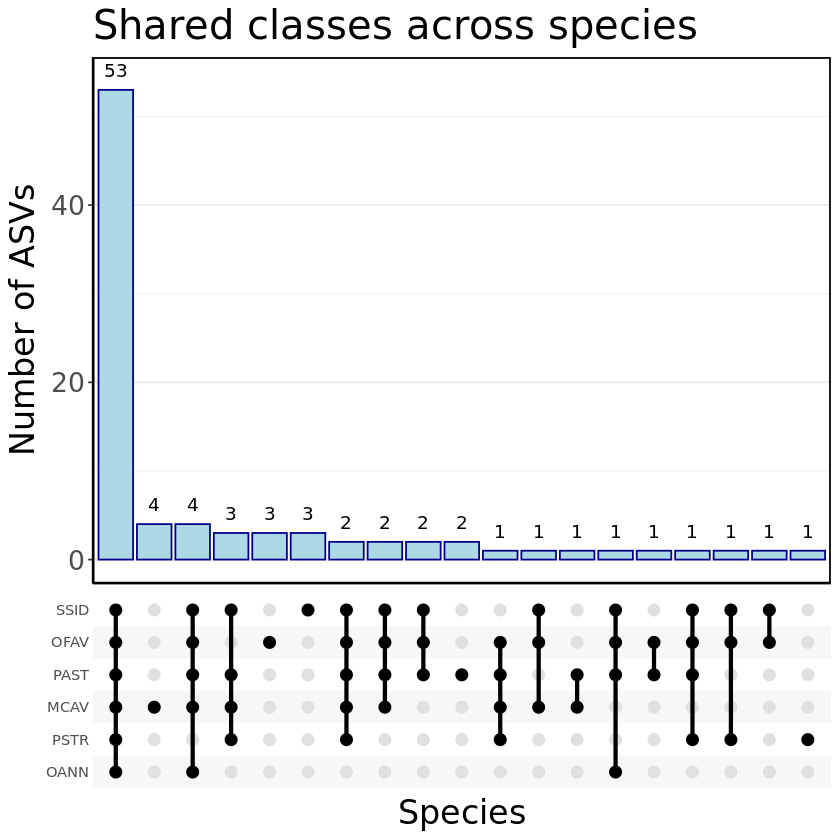

In [47]:
ps_combo%>%
ggplot(aes(x=combination)) +
    geom_bar(color="darkblue", fill="lightblue") +
    geom_text(stat='count', aes(label=after_stat(count)), vjust=-1) +
    scale_x_upset() +
    scale_y_continuous(lim = c(0, 54)) +
labs(title = "Shared classes across species",
       x = "Species",
       y = "Number of ASVs") +
theme_bw() +
  theme(
    legend.position = "right",
      legend.title = element_text(size = 20),
  legend.text = element_text(size = 15),
  legend.key.width = unit(1.3, "cm"),     # make the legend keys wider
  legend.key.height = unit(1.5, "cm"),   # make them taller
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1),
    text = element_text(size = 20)
  )

## Month year:Class

In [48]:
monyr_c <- compare_all %>%
  filter(Class %in% top100_class) %>%
  select(MonthYear, Class, PA) %>%
  group_by(MonthYear, Class) %>%
  summarise(PA = any(PA), .groups = "drop") %>%
  pivot_wider(
    names_from = Class,
    values_from = PA,
    values_fill = FALSE
  )

head(monyr_c)

MonthYear,Abditibacteriia,Acetothermiia,Acidimicrobiia,Acidobacteriae,Actinobacteria,Alphaproteobacteria,Aminicenantia,Anaerolineae,Babeliae,⋯,Spirochaetia,Sumerlaeia,Thermoanaerobacteria,Thermoanaerobaculia,Thermodesulfovibrionia,Thermoleophilia,Thermovenabulia,Vampirivibrionia,Verrucomicrobiia,Vicinamibacteria
<fct>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
May 2022,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
Sep 2023,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE
Feb 2024,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
Aug 2024,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
Dec 2023,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
Nov 2023,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE


In [ ]:
# dates in chronological order

In [ ]:
# Move the first column to row names
ps_mat <- monyr_c %>%
  tibble::column_to_rownames(var = colnames(monyr_c)[1])
# Transpose the matrix/data frame
monyr_c <- t(ps_mat)
head(monyr_c)
#make it a dataframe
monyr_c <- as.data.frame(monyr_c)

In [ ]:
##create a combination column
monyr_c <- monyr_c %>%
mutate(
    combination = pmap(
        list(MCAV, OANN, OFAV, PAST, PSTR, SSID), 
         \(lg1, lg2, lg3, lg4, lg5, lg6) {
         c('MCAV', 'OANN', 'OFAV', 'PAST', 'PSTR', 'SSID')[c(lg1, lg2, lg3, lg4, lg5, lg6)]}
            )
        )

In [ ]:
head(monyr_c)

In [ ]:
monyr_c%>%
ggplot(aes(x=combination)) +
    geom_bar(color="darkblue", fill="lightblue") +
    geom_text(stat='count', aes(label=after_stat(count)), vjust=-1) +
    scale_x_upset() +
    scale_y_continuous(lim = c(0, 54)) +
labs(title = "Shared classes across date sampled",
       x = "Date sampled",
       y = "Number of ASVs") +
theme_bw() +
  theme(
    legend.position = "right",
      legend.title = element_text(size = 20),
  legend.text = element_text(size = 15),
  legend.key.width = unit(1.3, "cm"),     # make the legend keys wider
  legend.key.height = unit(1.5, "cm"),   # make them taller
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1),
    text = element_text(size = 20)
  )

## old stuff from youtube

In [ ]:
#make combination column a variable instead of just a chr
#counts of all the combos of different subjects
compare_class <- compare_class %>%
mutate(
    combination = pmap_chr(
        list(MCAV, OANN, OFAV, PAST, PSTR, SSID), 
         \(lg1, lg2, lg3, lg4, lg5, lg6) {
         c('MCAV', 'OANN', 'OFAV', 'PAST', 'PSTR', 'SSID')[c(lg1, lg2, lg3, lg4, lg5, lg6)]}%>%
               paste0(collapse = ',') 
            )
        )%>%
count(combination) %>%
mutate(
    combination = fct_reorder(combination, n, .desc = TRUE
    )
    



In [ ]:
#counts for the individual subjects
ps_t %>%
    pivot_longer(
        cols = species
        values_to = "
        

In [109]:
# Plot
upset(ps_wide, 
      nintersects = NA, # number of interactions to plot, set to NA if intersections should be plotted
      nsets = 6, #number of sets to look at (in case of species 6)
      order.by = "freq", #how the intersections in the matrix should be ordered, options include freq and degress
      decreasing = T, # ordered in decreasing frequency of asv
      mb.ratio = c(0.6, 0.4), #ratio bw matrix plot and histogram
      number.angles = 0, 
      text.scale = 1.1, 
      point.size = 2.8, 
      line.size = 1,
      mainbar.y.label = "ASV interactions", sets.x.label = "Samples per Species",
      )

ERROR: Error in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, : unused arguments (nintersects = NA, nsets = 6, order.by = "freq", decreasing = TRUE, mb.ratio = c(0.6, 0.4), number.angles = 0, text.scale = 1.1, point.size = 2.8, line.size = 1, mainbar.y.label = "ASV interactions", sets.x.label = "Samples per Species")


In [ ]:
## 

## heatmap, complex heatmaps are tough

In [90]:
library(ComplexHeatmap)
mat <- ps_long %>%
  select(OTU, Sample, PA) %>%
  mutate(PA = as.logical(PA)) %>%     # convert TRUE/FALSE
  tidyr::pivot_wider(
    names_from = Sample,
    values_from = PA,
    values_fill = list(PA = FALSE)    # fill missing with FALSE
  )

# Convert to base R matrix
rownames_vec <- mat$OTU
mat <- as.matrix(mat[,-1])
rownames(mat) <- rownames_vec
# Ensure matrix is logical
storage.mode(mat) <- "logical"

# Now call UpSet
UpSet(mat, set_on_rows = FALSE)

# transect?

## what are the most abundant otus across date_sampled?

## more venn diagrams LFG